<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузим-и-изучим-данные" data-toc-modified-id="Загрузим-и-изучим-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузим и изучим данные</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Ответим-на-вопросы" data-toc-modified-id="Ответим-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответим на вопросы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Разберемся, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# Описание данных:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;  
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента;
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита;

## Загрузим и изучим данные

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pymystem3 import Mystem

Сохраним датафрейм в переменной.

In [2]:
df = pd.read_csv('/datasets/data.csv')

Выведем на экран первые 10 строк таблицы.

In [3]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Посмотрим на общую информацию.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице 12 столбцов. Тип данных для столбцов с числовым значением — `int64` и `float64`, а со строчным — `object`. 

Согласно документации к данным:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;  
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента;
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита;


Количество ненулевых значений в столбцах `days_employed` и `total_income` меньше чем в других столбцах. Значит, в данных есть пропущенные значения.


**Вывод**

Каждая строка таблицы описыает - данные о клиенте-заёмщике. Часть колонок описывает его семейное положение: количество детей в семье, семейное положение и его идентификатор. Остальные данные рассказывают о клиенте и его работе: трудовой стаж, возраст, уровень образования и его идентификатор, пол, тип занятости, задолженность по кредиту, ежемесячный доход, цель получения кредита. 

Предварительно можно утверждать, что, данных достаточно для исследования. Но встречаются пропуски в данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Обработка пропусков

Для начала поменяем отрицательные значения на положительные в столбце `days_employed`. 

In [5]:
# замена отрицательных значений трудового стража на положительные
df.loc[df['days_employed'] < 0, 'days_employed'] = df.loc[df['days_employed'] < 0, 
                                                          'days_employed'] * -1

Построим гистограммы трудового стажа и ежемесячного дохода.

Text(0, 0.5, 'Number of people')

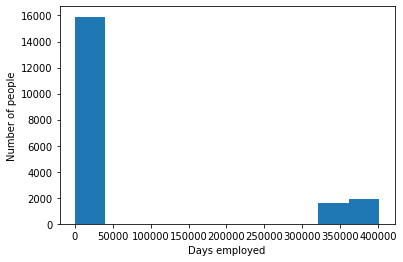

In [6]:
plt.hist(df['days_employed']) # создание гистограммы для столбца days_employed
plt.xlabel('Days employed') # название горизонтальной оси гистограммы
plt.ylabel('Number of people') # название вертикальной оси гистограммы

Text(0, 0.5, 'Number of people')

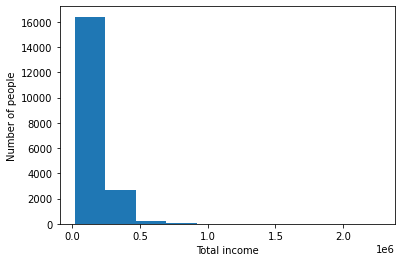

In [7]:
plt.hist(df['total_income']) # создание гистограммы для столбца total_income
plt.xlabel('Total income') # название горизонтальной оси гистограммы
plt.ylabel('Number of people') # название вертикальной оси гистограммы

По гистограммам столбца `days_employed` и `total_income` видно что лучше брать медианное значение, так как среднее значение даст большую ошибку.

Заменим пропущенные значения на медианные.

In [8]:
days_employed_meadian = df['days_employed'].median() # подсчет медианного значения для столбца days_employed
total_income_median = df['total_income'].median() # подсчет медианного значения для столбца total_income

In [9]:
df['days_employed'] = df['days_employed'].fillna(days_employed_meadian)  
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median')) 

Посмотрим после преобразований на общую информацию.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Группируем по возрасту.

In [11]:
df.groupby('dob_years')['dob_years'].count()

dob_years
0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

**Вывод**

Отрицательные данные в столбце `days_employed` были заменеы на положительные. Но часть значений стажа у пенсионеров сильно разнятся с другими значениями. Возможно это ошибка, и при расчетах мы бы получили неверную картину. 

Пропущенные значения были заменены на медианные значения соответсвующих столбцов. 

Также в столбце `dob_years` присутсвует ошибка в возрасте клиентов в виде нуля. Это ошибка, и при участии в расчете этого столбца результаты исследования исказились бы.

### Замена типа данных

In [12]:
df['days_employed'] = df['days_employed'].astype('int') #перевод значений столбца days_employed в тип данных int
df['total_income'] = df['total_income'].astype('int') #перевод значений столбца total_income в тип данных int

In [13]:
# вывод уникальных значений столбца и их количество
df['children'].value_counts() 

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [14]:
# замена отрицательного количества детей
df['children'] = df['children'].replace(-1, 1)  

In [15]:
# подсчет медианного значения столбца children кроме значения 20
children_mean = df.loc[df.loc[:, 'children'] != 20]['children'].median() 

In [16]:
# замена количества детей 20 на медианное значение children_mean
df['children'] = df['children'].replace(20, children_mean)

In [17]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  float64
 1   days_employed     21525 non-null  int64  
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


**Вывод**

Тип данных столбца `days_employed` и `total_income` необходимо поменять на int, так как дни и доход обычно считаются целочисленно.

Значения в столбце `children` имеют две ошибки. Первая - отрицательное значение детей, вторая - количество в 20 детей возможно является ошибкой, поэтому мы заменили значение 20 на медианное.

### Обработка дубликатов

In [18]:
# вывод уникальных значений столбца и их количество
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [19]:
# переводим буквы в строчный вид
df['education'] = df['education'].str.lower()

In [20]:
# повторный вывод уникальных значений столбца
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [21]:
# подсчет количества строк янвых дубликатов
df.duplicated().sum()

71

In [22]:
# удаление явных дубликатов
df = df.drop_duplicates()

In [23]:
# получаем уникальные значения столбца и их количество
df['gender'].value_counts()

F      14174
M       7279
XNA        1
Name: gender, dtype: int64

**Вывод**

Неявные дубликаты присутствовали в столбце `education`. Для их обработки необходимо было только поменять значения - перевести буквы в строчный вид. Явные дубликаты также присутствовали и были удалены соответсвующим методом.

В таблице `gender` помимо двух значений присутсвует третье значение - XNA. Возможно это ошибка. Если бы мы знали имя клиента, то исправили бы значение. Но поскольку этот столбец не принимает участие в расчете, и количество такого значение не велико, то на ход исследования это не повлияет. 

### Лемматизация

In [24]:
# записываем в новую переменную уникальные значения целей кредита
purpose_list = df['purpose'].unique()

In [25]:
m = Mystem()

lemmas = [] # создаем пустой список для лемматизированных слов
for purpose in purpose_list: # прогоняем переменную-итератор purpose по столбцу purpose_list
    lemma = " ".join(m.lemmatize(purpose)) # с помощью join выводим строку лемметизированных слов
    lemmas.append(lemma) # добавляем лемметизированные слова в пустой список

**Вывод**

Цели получения кредита названы по разному, однако все их можно категорировать. Для этого необходимо было сначала лемматизировать слова. 

### Категоризация данных

Для категоризации целей кредита напишем функцию `purpose_change`.

In [26]:
# создание функции purpose_change() 
def purpose_change(purpose):
    lemmas_row = ' '.join(m.lemmatize(purpose)) 
    if 'авто' in lemmas_row:
        return 'авто'
    if 'свад' in lemmas_row:
        return  'свадба'
    if 'образов' in lemmas_row:
        return 'образование'
    if 'недвиж' in lemmas_row:
        return  'недвижимость'
    if 'жил' in lemmas_row:
        return  'недвижимость'
    else:
        return 'неизвестное'
# Объявляем функцию с параметром purpose,
# с помощью join выводим строку лемметизированных слов,
# используем условный оператор if, 
# в его выражении проверяем наличие необходимых слов, 
# в инструкции возваращем полное слово категории в новый столбец.

In [27]:
# применение функции purpose_change к столбцу purpose
df['purpose_def']= df['purpose'].apply(purpose_change)        

In [28]:
# разделим значения дохода на равные части
df['total_income_quantile'] = pd.qcut(df['total_income'], q=10, precision=0)

In [29]:
# получение первых 5 строк таблицы df
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_def,total_income_quantile
0,1.0,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,"(214618.0, 269826.0]"
1,1.0,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,авто,"(98538.0, 116009.0]"
2,0.0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,"(142594.0, 161335.0]"
3,3.0,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,"(214618.0, 269826.0]"
4,0.0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадба,"(142594.0, 161335.0]"


**Вывод**

Для простоты решения поставленной задачи - зависимости возврата кредита в срок от цели кредита,значения столбца `purpose` были откатегорированны.

## Ответим на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [30]:
# подсчет количества, суммы и среднего значения задолженности клиента в зависимости от количества детей 
debt_from_children = df.groupby('children').agg({'debt': ['count', 'sum', 'mean']})

In [31]:
# вывод сгруппированного датафрейма
debt_from_children

debt                
          count   sum      mean
children                       
0.0       14167  1071  0.075598
1.0        4855   445  0.091658
2.0        2052   194  0.094542
3.0         330    27  0.081818
4.0          41     4  0.097561
5.0           9     0  0.000000

**Вывод**

Из вывода видно, чем больше детей, тем вероятность просрочки заемщика выше. Хотя у клиентов с 3 детьми веротяность просрочки кредита меньше чем у тех у кого один ребенок. У бездетных просрочка по оплате меньше всего. Для клиентов с 4 и 5 детьми выборка маленькая, чтобы делать окончательный вывод.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [32]:
# переименование группы заемщиков 'гражданский брак' на 'женат / замужем'
df['family_status'] = df['family_status'].replace('гражданский брак', 'женат / замужем')

In [33]:
# подсчет количества, суммы и среднего значениязадолженности клиента в зависимости от статуса семьи 
debt_from_family_status = df.groupby('family_status').agg({'debt': ['count', 'sum', 'mean']})

In [34]:
# вывод сгруппированного датафрейма
debt_from_family_status

debt                
                       count   sum      mean
family_status                               
Не женат / не замужем   2810   274  0.097509
в разводе               1195    85  0.071130
вдовец / вдова           959    63  0.065693
женат / замужем        16490  1319  0.079988

**Вывод**

Разведенные, овдовевшие и клиенты в браке чаще платят в срок, чем клиенты не в браке. 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [35]:
# подсчет количества, суммы и среднего значения задолженности клиента в зависимости от группы ежемесячного дохода
debt_from_total_income_id = df.groupby('total_income_quantile').agg({'debt': ['count', 'sum', 'mean']})

In [36]:
# вывод сгруппированного датафрейма
debt_from_total_income_id.reset_index()

total_income_quantile  debt               
                         count  sum      mean
0     (20666.0, 78721.0]  2146  157  0.073159
1     (78721.0, 98538.0]  2145  187  0.087179
2    (98538.0, 116009.0]  2145  179  0.083450
3   (116009.0, 132134.0]  2146  182  0.084809
4   (132134.0, 142594.0]  2261  205  0.090668
5   (142594.0, 161335.0]  2029  170  0.083785
6   (161335.0, 179805.0]  2146  181  0.084343
7   (179805.0, 214618.0]  2145  180  0.083916
8   (214618.0, 269826.0]  2145  149  0.069464
9  (269826.0, 2265604.0]  2146  151  0.070363

**Вывод**

Чаще платят кредит в срок группа клиентов, доход которых состовляет от 20666 до 78721 - c индексом строки 0, от 214606 до 269797 - c индексом строки 8, от 269797 до 2265604 - c индексом строки 9. Но явной зависимости  между уровнем дохода и возвратом кредита в срок нет.

- Как разные цели кредита влияют на его возврат в срок?

In [37]:
# подсчет количества, суммы и среднего значения задолженности клиента в зависимости от целей кредита
debt_from_purpose_def = df.groupby('purpose_def').agg({'debt': ['count', 'sum', 'mean']})

In [38]:
# вывод сгруппированного датафрейма
debt_from_purpose_def

debt               
              count  sum      mean
purpose_def                       
авто           4306  403  0.093590
недвижимость  10811  782  0.072334
образование    4013  370  0.092200
свадба         2324  186  0.080034

**Вывод**

Чаще всего платят в срок с целью кредита на недвижимость и свадьбу. Реже в срок платят клиенты с целью кредита на авто и образование. 

## Общий вывод

Семейное положение влияет на возврат кредита. Разведенные, овдовевшие и клиенты в браке чаще платят в срок, чем клиенты не в браке. 

Для финального ответа на вопрос зависимости факта наличия детей на возврат кредита необходима большая выборка для количества 4 и 5 детей. Но по имеющимся данным зависимость наблюдается. Чем больше детей, тем реже будет платиться кредит в срок. 